## Prediction using Supervised Machine Learning


### Author : SHIKHA
#### DATA SCIENCE AND BUSINESS ANALYTICS INTERN MARCH 2021 (1 MONTH)
####  The Sparks Foundation

## __ __ __ __ __ __ __ __ __ 

## Objective
#### Predict the percentage of an student based on the no. of hours studied
#### what will be predicted score if a student studies for 9.25 hours/day?



In [170]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [4]:
#DATASET URL
data_url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"


In [5]:
#IMPORTING THE DATASET
df=pd.read_csv(data_url)

In [11]:
#NO. OF RECORDS DATASET CONTAINS
df.shape

(25, 2)

In [12]:
#TAKING A GLANCE AT DATA
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


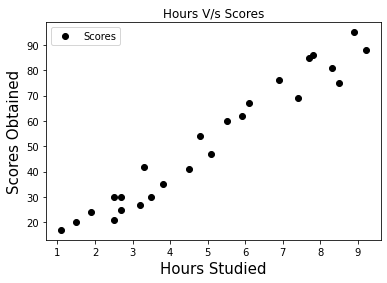

In [169]:
#VISUALIZING THE DATA TO GET BETTER INSIGHT 
df.plot(x="Hours",y="Scores",style="o",C='BLACK')
plt.title("Hours V/s Scores")
plt.xlabel("Hours Studied",size=15)
plt.ylabel("Scores Obtained",size=15)
plt.show()

##### SCATTER PLOT CLEARLY SHOWS THAT MARKS OBTAINED IS DIRECTLY PROPORTIONAL TO THE HOURS STUDIED

In [15]:
#NAME OF THE FEATURES
df.columns

Index(['Hours', 'Scores'], dtype='object')

## PREPARING THE DATA

In [108]:
#SEPRATING THE INDEPENDENT VARIABLE(Hours) AND DEPENDENT VARIABLE(Scores)
X = df.iloc[:, :-1].values #independent variables values  
Y = df.iloc[:, 1].values     #target variable

In [109]:
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [110]:
#IMPORTING THE LIBRARY FOR SPLITTING THE DATA INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
#test_size =0.2 says that 20% of the data will be used for testing the data and rest 80% of the data will be used for the training and making the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## TRAINING AND BUILDING THE MODEL

AS THE DEPENDENT VARIABLE('Scores') IS A CONTINOUS VARIABLE AND LINEARLY DEPEND ON THE INDEPENDENT VARIABLE('Hours').THIS SUGGESTS THAT THIS A SIMPLE LINEAR REGRESSION PROBLEM .
HENCE WE WILL CREATE A LINEAR REGRESSION MODEL FOR THIS DATA.

In [111]:
#IMPORTING THE LIBRARY FOR BUILIDING THE MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [112]:
#PREDICTING THE SCORES OF THE TEST DATA
y_predict=regressor.predict(X_test)

## MODEL

In [113]:
print("coefficnet of Hours ={}".format(regressor.coef_[0]))
print("intercept ={}".format(regressor.intercept_))


coefficnet of Hours =9.910656480642237
intercept =2.018160041434683


In [167]:
# LINEAR MODEL EQUATION

print("Scores={:.4f}Hours+{:.4f}".format(regressor.coef_[0],regressor.intercept_))


Scores=9.9107Hours+2.0182


## VISUALIZING MODEL

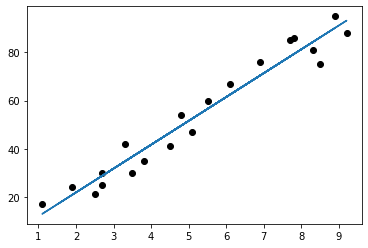

In [115]:
#visualizing with respect to our training data
line=regressor.coef_*X+regressor.intercept_
plt.scatter(x=X_train,y=Y_train,c="black")
plt.plot(X,line)

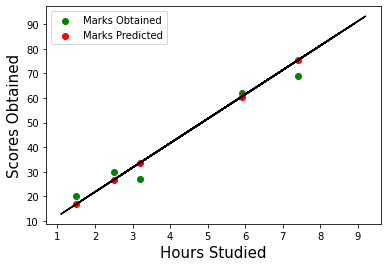

In [116]:
#visualizing the model 
plt.scatter(X_test,Y_test,c='green',label="Marks Obtained")
plt.scatter(X_test,y_predict,c='red',label="Marks Predicted")
plt.plot(X,line,c="black")
plt.xlabel("Hours Studied",size=15)
plt.ylabel("Scores Obtained",size=15)
plt.legend()

## EVALUATING THE MODEL
 

In [156]:
obt_pred=pd.DataFrame()
marks=[j for i in X_test for j in i]
obt_pred["MARKS"]=marks
obt_pred["MARKS OBTAINED"]=Y_test
obt_pred["MARKS PREDCITED"]=y_predict
obt_pred.head()


,MARKS,MARKS OBTAINED,MARKS PREDCITED
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [157]:
#EVALUATING THE PERFORMANCE OF THE MODEL
from sklearn.metrics import r2_score
accuracy=r2_score(Y_test,y_predict)
print("Accuracy",accuracy)

Accuracy 0.9454906892105356


## PREDICTIONS

PREDCITING THE MARKS OBTAINED BY THE STUDENT IF S/HE STUDIES FOR 9.25 HOURS/DAY ON THE BASIS OF MODEL BUILD  

In [119]:
hours_studied = [[9.25]]
scores_predicted = regressor.predict(hours_studied)

In [134]:
print("No. Of Hours Studied=",*hours_studied[0])
print("Predicted Scores =",*scores_predicted)

No. Of Hours Studied= 9.25
Predicted Scores = 93.69173248737538
